# Affinity Propagation

모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

* responsibility $r(i, k)$

    * $k$번째 데이터가 $i$번째 데이터의 대표가 되어야 한다는 근거


* availability $a(i, k)$

    * $i$번째 데이터가 $k$번째 데이터를 대표로 선택해야 한다는 근거
    
    
* 다음 수식을 수렴할 때까지 반복

$$ r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} ( a(i, k') + s(i, k')) $$

$$ a(i, k) \leftarrow \min(0, r(k, k) + \sum_{i' \neq i,k} r(i', k)) $$

여기에서 $s(i,k)$는 다음과 같이 음의 거리로 정의되는 유사도이다.

$$ s(i,k) = -|| x_i - x_k ||^2 $$

특히 $s(k,k)$는 특정한 음수 값으로 사용자가 정해 주게 되는데 이 값에 따라서 클러스터의 갯수가 달라지는 하이퍼 모수가 된다. $s(k,k)$가 크면 자기 자신에 대한 유사도가 커져서 클러스터의 수가 증가한다.

위 알고리즘으로 계산하는 $r$, $a$가 더 이상 변화하지 않고 수렴하면 계산이 종료되고 종료 시점에서 $r(k,k) + a(k,k) > 0$이 데이터가 클러스터의 중심이 된다.

### 예

* http://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html

In [8]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [9]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)

In [10]:
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


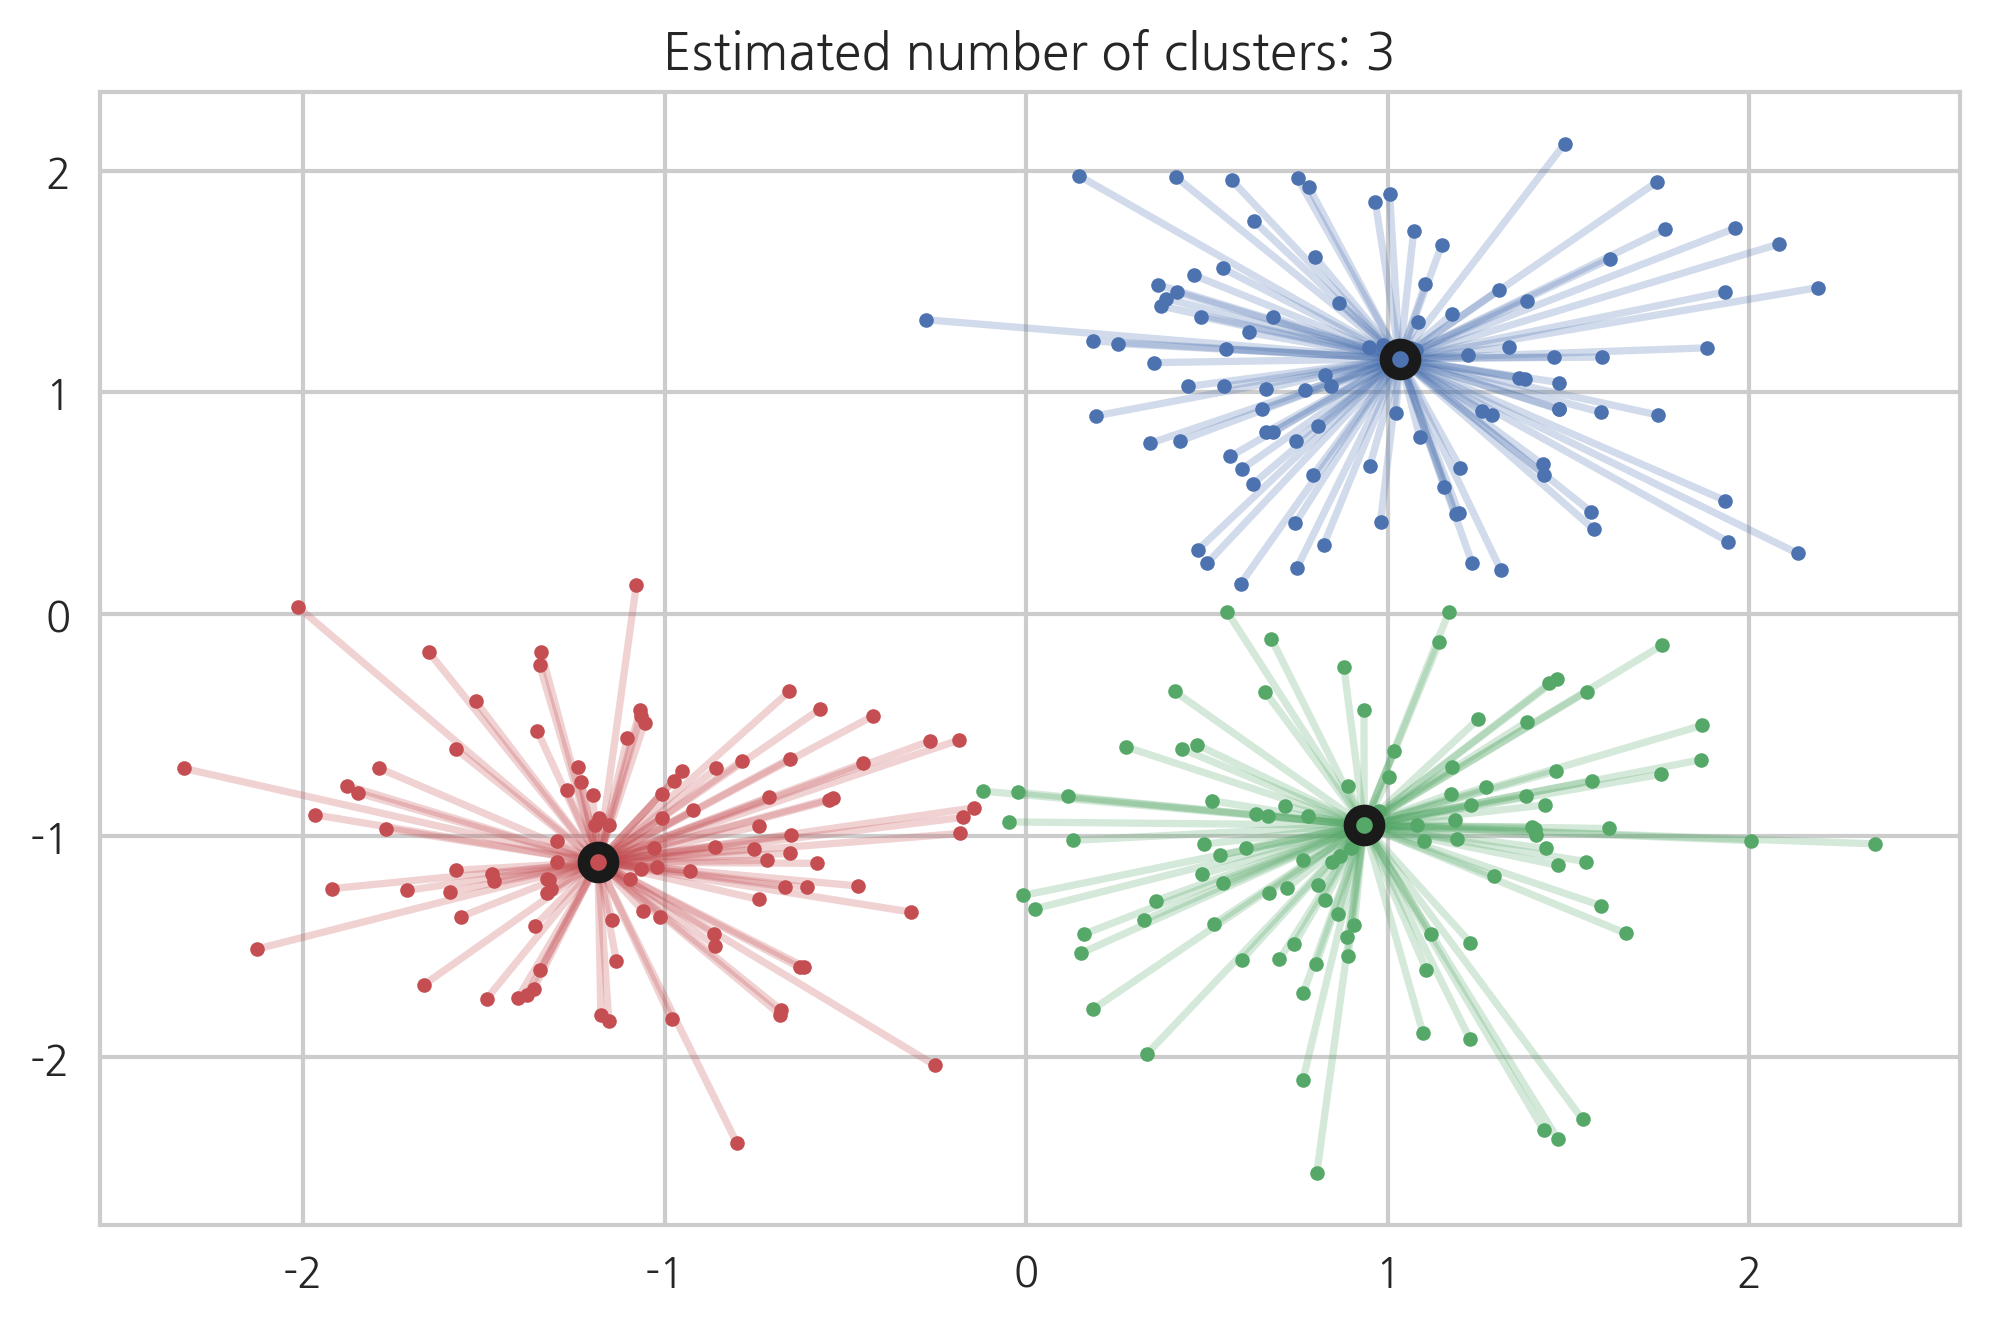

In [11]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()